In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/Mall_Customers.csv'
df = pd.read_csv(file_path)

# Display the first few rows to inspect the dataset
df.head(), df.info(), df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


(   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
 0           1    Male   19                  15                      39
 1           2    Male   21                  15                      81
 2           3  Female   20                  16                       6
 3           4  Female   23                  16                      77
 4           5  Female   31                  17                      40,
 None,
 CustomerID                0
 Gender                    0
 Age                       0
 Annual Income (k$)        0
 Spending Score (1-100)    0
 dtype: int64)

In [ ]:
# One-hot encode the 'Gender' column and drop 'CustomerID'
df_encoded = pd.get_dummies(df.drop('CustomerID', axis=1), drop_first=True)

# Display the first few rows to confirm encoding
df_encoded.head()


,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,True
1,21,15,81,True
2,20,16,6,False
3,23,16,77,False
4,31,17,40,False


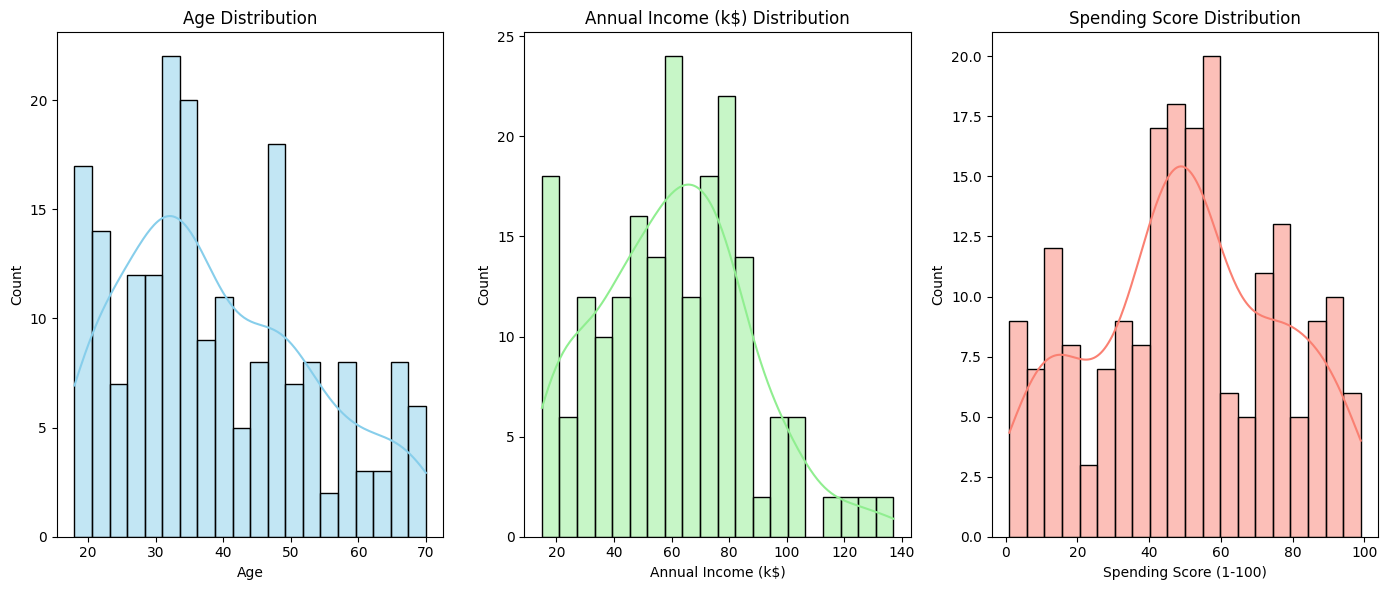

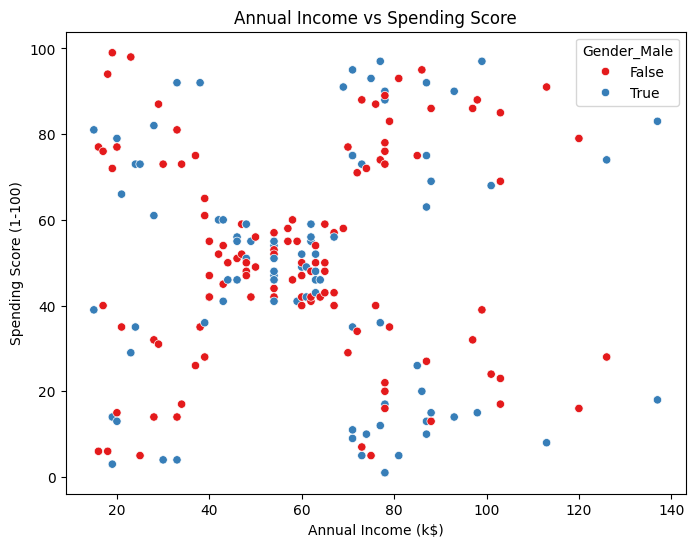

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for multiple plots
plt.figure(figsize=(14, 6))

# Subplot 1: Distribution of Age
plt.subplot(1, 3, 1)
sns.histplot(df_encoded['Age'], kde=True, bins=20, color='skyblue')
plt.title('Age Distribution')

# Subplot 2: Distribution of Annual Income (k$)
plt.subplot(1, 3, 2)
sns.histplot(df_encoded['Annual Income (k$)'], kde=True, bins=20, color='lightgreen')
plt.title('Annual Income (k$) Distribution')

# Subplot 3: Distribution of Spending Score (1-100)
plt.subplot(1, 3, 3)
sns.histplot(df_encoded['Spending Score (1-100)'], kde=True, bins=20, color='salmon')
plt.title('Spending Score Distribution')

plt.tight_layout()
plt.show()

# Scatterplot to visualize relationship between Annual Income and Spending Score
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender_Male', data=df_encoded, palette='Set1')
plt.title('Annual Income vs Spending Score')
plt.show()


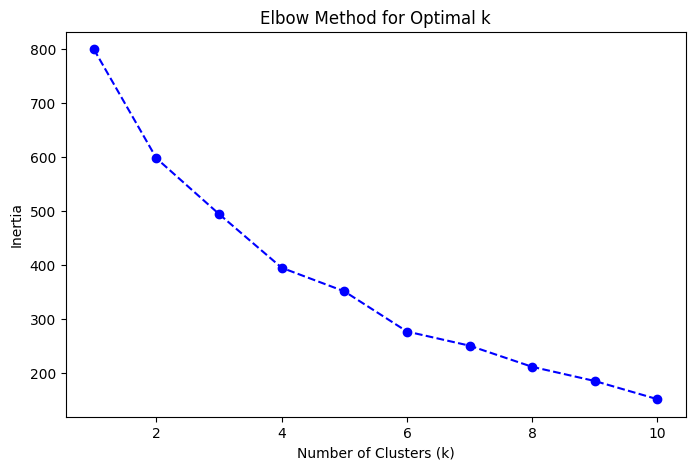

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Normalize the data using StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_encoded)

# Apply K-Means clustering for a range of cluster numbers (1 to 10)
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve to find the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [ ]:
# Apply K-Means clustering with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df_encoded['Cluster'] = kmeans.fit_predict(df_scaled)

# Analyze the characteristics of each cluster by calculating the mean of each feature for each cluster
cluster_analysis = df_encoded.groupby('Cluster').mean()

cluster_analysis


,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
Cluster,,,,
0,56.470588,46.098039,39.313725,0.509804
1,39.500000,85.150000,14.050000,1.000000
2,28.690476,60.904762,70.238095,1.000000
3,37.897959,82.122449,54.448980,0.000000
4,27.315789,38.842105,56.210526,0.000000


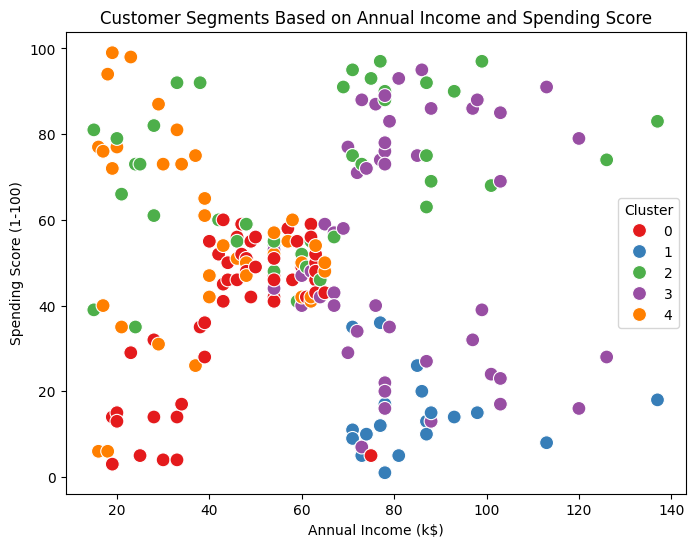

In [ ]:
# Visualize the clusters in a 2D plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1', data=df_encoded, s=100)
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.show()
